## installation

In [ ]:
!pip install librosa


## Loading an audio file:



In [1]:
import librosa
audio_data = '/content/LJ037-0171.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))#<class 'numpy.ndarray'> <class 'int'>print(x.shape, sr)#(94316,) 22050

<class 'numpy.ndarray'> <class 'int'>


## An audio time series as a numpy array with a default sampling rate(sr) of 22KHZ mono. We can change this behavior by resampling at 44.1KHz.

In [2]:
librosa.load(audio_data, sr=44100)


(array([-0.00044209, -0.00051487, -0.00044291, ..., -0.0006555 ,
        -0.00088483, -0.00055178], dtype=float32), 44100)

## play audio

In [3]:
import IPython.display as ipd
ipd.Audio(audio_data)

## visualize the audio

We can plot the audio array using librosa.display.waveplot:

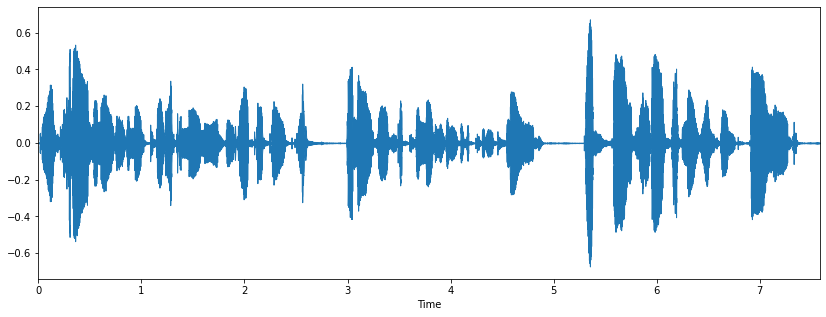

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the color or brightness.

We can display a spectrogram using. librosa.display.specshow.

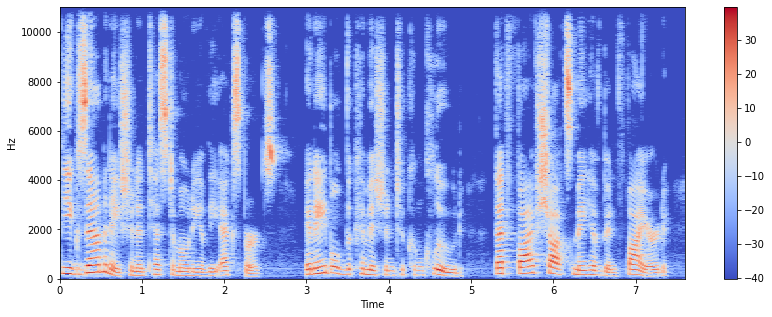

In [5]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

The vertical axis shows frequencies (from 0 to 10kHz), and the horizontal axis shows the time of the clip. Since we see that all action is taking place at the bottom of the spectrum, we can convert the frequency axis to a logarithmic one.

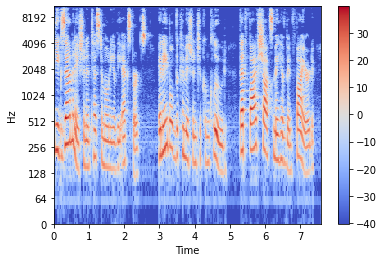

In [6]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

Create an Audio Signal:



In [7]:
import numpy as np
import soundfile as sf

sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array

#Saving the audio
sf.write('tone_220.wav',  x, sr, 'PCM_24')


Feature extraction from Audio signal
 
Every audio signal consists of many features. However, we must extract the characteristics that are relevant to the problem we are trying to solve. The process of extracting features to use them for analysis is called feature extraction. Let us study a few of the features in detail.

The spectral features (frequency-based features), which are obtained by converting the time-based signal into the frequency domain using the Fourier Transform, like fundamental frequency, frequency components, spectral centroid, spectral flux, spectral density, spectral roll-off, etc.

1. Spectral Centroid

The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located. This is like a weighted mean:
where S(k) is the spectral magnitude at frequency bin k, f(k) is the frequency at bin k.

librosa.feature.spectral_centroid computes the spectral centroid for each frame in a signal

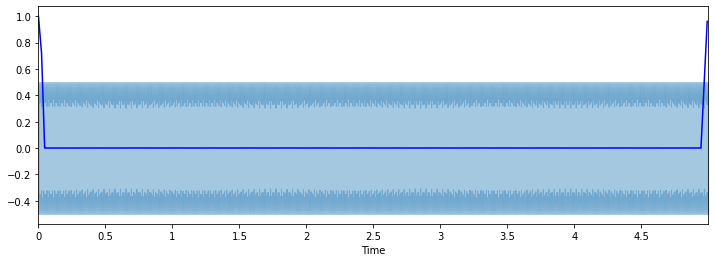

In [8]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

2. Spectral Rolloff

It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0. To obtain it, we have to calculate the fraction of bins in the power spectrum where 85% of its power is at lower frequencies.

librosa.feature.spectral_rolloff computes the rolloff frequency for each frame in a signal:

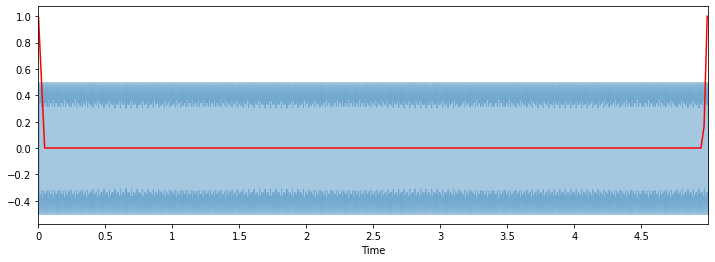

In [9]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

librosa.feature.spectral_bandwidth computes the order-p spectral bandwidth:



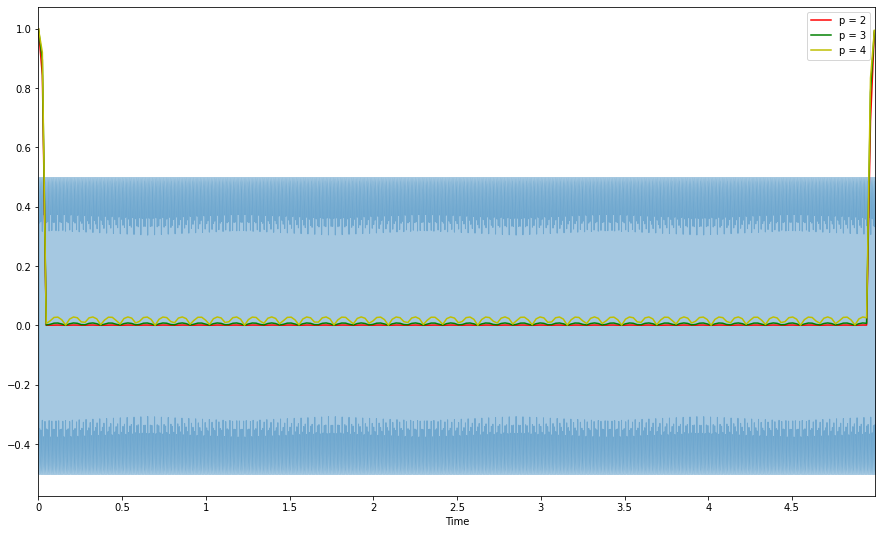

In [10]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

4. Zero-Crossing Rate

A very simple way for measuring the smoothness of a signal is to calculate the number of zero-crossing within a segment of that signal. A voice signal oscillates slowly — for example, a 100 Hz signal will cross zero 100 per second — whereas an unvoiced fricative can have 3000 zero crossings per second.

It usually has higher values for highly percussive sounds like those in metal and rock. Now let us visualize it and see how we calculate zero crossing rate.

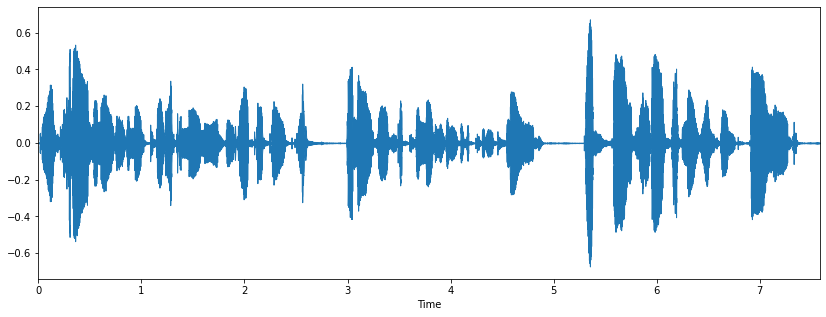

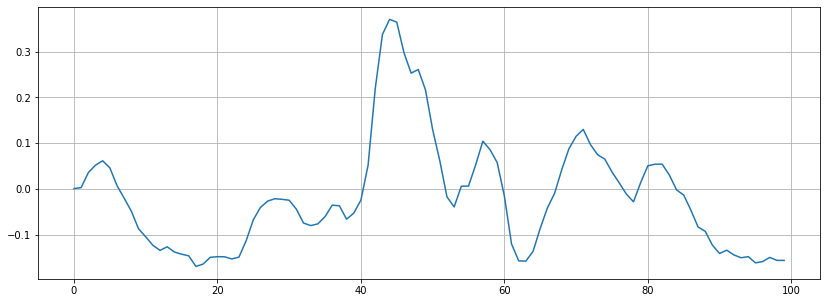

In [12]:
x, sr = librosa.load('LJ037-0171.wav')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()


Zooming in



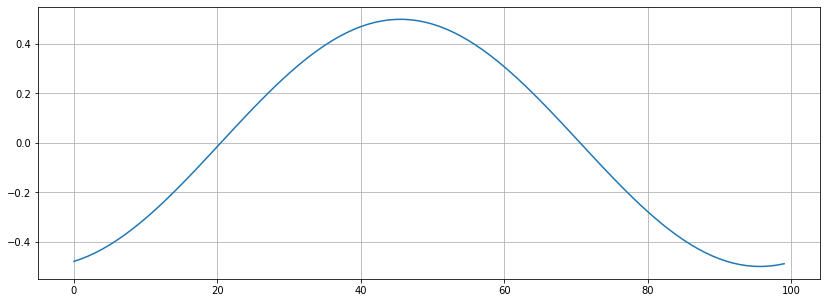

In [ ]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [13]:
# Clone the Transformer TTS and MelGAN repos
!git clone https://github.com/as-ideas/TransformerTTS.git
!git clone https://github.com/seungwonpark/melgan.git
# Install requirements
!apt-get install -y espeak
!pip install -r TransformerTTS/requirements.txt
!cd TransformerTTS/; git checkout c3405c53e435a06c809533aa4453923469081147

# Set up the paths
from pathlib import Path
MelGAN_path = 'melgan/'
TTS_path = 'TransformerTTS/'

import sys
sys.path.append(TTS_path)

!pip install ruamel.yaml
!pip install phonemizer
!pip install webrtcvad
!pip install pyworld

# Load pretrained model
from model.factory import tts_ljspeech
from data.audio import Audio

model, config = tts_ljspeech()
audio = Audio(config)

Cloning into 'TransformerTTS'...
remote: Enumerating objects: 4161, done.
remote: Counting objects: 100% (700/700), done.
remote: Compressing objects: 100% (240/240), done.
remote: Total 4161 (delta 491), reused 647 (delta 459), pack-reused 3461
Receiving objects: 100% (4161/4161), 26.02 MiB | 22.60 MiB/s, done.
Resolving deltas: 100% (2861/2861), done.
Cloning into 'melgan'...
remote: Enumerating objects: 396, done.
remote: Total 396 (delta 0), reused 0 (delta 0), pack-reused 396
Receiving objects: 100% (396/396), 18.04 MiB | 24.82 MiB/s, done.
Resolving deltas: 100% (185/185), done.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  espeak-data libespeak1 libportaudio2 libsonic0
The following NEW packages will be installed:
  espeak espeak-data libespeak1 libportaudio2 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,219 kB of archives.
After this

Note: checking out 'c3405c53e435a06c809533aa4453923469081147'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at c3405c5 Fix path.
175644672/175635288 [==============================] - 8s 0us/step


In [15]:
# Synthesize text
sentence = "Christmas is celebrated on December 25 and is both a sacred religious holiday and a worldwide cultural and commercial phenomenon. For two millennia, people around the world have been observing it with traditions and practices that are both religious and secular in nature. Christians celebrate Christmas Day as the anniversary of the birth of Jesus of Nazareth, a spiritual leader whose teachings form the basis of their religion. Popular customs include exchanging gifts, decorating Christmas trees, attending church, sharing meals with family and friends and, of course, waiting for Santa Claus to arrive. December 25—Christmas Day—has been a federal holiday in the United States since 1870."

out_normal = model.predict(sentence)

In [16]:
# Convert spectrogram to wav (with griffin lim)
wav = audio.reconstruct_waveform(out_normal['mel'].numpy().T)

In [17]:
import IPython.display as ipd

ipd.display(ipd.Audio(wav, rate=config['sampling_rate']))

Output hidden; open in https://colab.research.google.com to view.